Esse projeto tem como objetivo aplicar meus aprendizados de análise de dados com Python em um projeto de dados abertos referentes à segurança pública. 

Esse projeto busca possibilizar a visualização e entendimentos sobre as informações disponibilizadas. Eu criei algumas perguntas com base na base de dados onde me permitissem mostrar meus conhecimentos.

Será trabalhado com duas tabelas, a Ocorrências que possui as colunas UF, tipo de crime, ano, mês, ocorrência. A outra tabela é de vítimas, que possui os campos UF, tipo de crime, ano, mês, sexo da vitima e vítimas.

In [1]:
#Primeiro importnado bibliotecas que serão utilizadas
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import statistics as sts
import seaborn as sns

In [2]:

#trazendo a base de dados para o python
caminho='indicadoressegurancapublicauf.xlsx'
df=pd.ExcelFile(caminho)
df.sheet_names

['Ocorrências', 'Vítimas']

In [3]:
#trazendo a tabela ocorrências
ocorrencia = pd.read_excel(caminho, sheet_name=df.sheet_names[0])
ocorrencia.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [4]:
#trazendo a tabela vítimas
vitimas = pd.read_excel(caminho, sheet_name=df.sheet_names[1])
vitimas.head()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
2,Acre,Homicídio doloso,2022,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10


Na tabela vítimas existe no campo de sexo uma informação chamada "sexo NI", entrei em contato com o MJSP para entender que tipo de informação era essa, como até o momento não obtive resposta, apenas removerei as linhas que possuem essa informação para não afetar os resultados.

In [5]:
vitimas = vitimas[vitimas['Sexo da Vítima'] != 'Sexo NI']
vitimas.head(20)

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2022,janeiro,Feminino,2
1,Acre,Homicídio doloso,2022,janeiro,Masculino,8
3,Acre,Homicídio doloso,2022,fevereiro,Feminino,0
4,Acre,Homicídio doloso,2022,fevereiro,Masculino,10
6,Acre,Homicídio doloso,2022,março,Feminino,2
7,Acre,Homicídio doloso,2022,março,Masculino,19
9,Acre,Homicídio doloso,2022,abril,Feminino,2
10,Acre,Homicídio doloso,2022,abril,Masculino,19
11,Acre,Homicídio doloso,2022,maio,Feminino,6
12,Acre,Homicídio doloso,2022,maio,Masculino,17


Agora fiz a verificação se existia mais alguma informação nula ou vazia em algum campos da tabela, como resultados vê-se que não

In [6]:
vitimas.isnull().any()
ocorrencia.isnull().any()

UF             False
Tipo Crime     False
Ano            False
Mês            False
Ocorrências    False
dtype: bool

Quando comecei a analisar as informações para excel, fiz algumas perguntas e percebi que podia fazer algumas análises para responder com a estatística básica.

1. Top 3 estados por crime no ano de 2022
2. Top 3 crimes por estado no ano de 2018
3. Quais violências atingem mais as mulheres?
4. Quais violências atingem mais os homens?
5. Qual mês mais violento por crime em 2017 em Santa Catarina?
6. Quais os crimes com maior frequência em cada ano no mês de dezembro?
7. Quais os crimes com maior frequência em cada ano no estado do Maranhão?

Como tenho duas tabelas com informações complementares e distintas, informarei qual tabela usarei para responder cada pergunta, para não misturar informações e acabar "sujando" a análise.

# Top 3 estados por crime no ano de 2022


Utilizarei a tabela ocorrência para análise das informações.
Comecei a filtrar o ano em que eu queria analisar.
Depois, agrupei pelo tipo de crime e estado, somando as ocorrências.
Por fim, usando um short, ordeno em forma decrescente a quantidade de ocorrências por estado, para verificar quais estados possuem maior frequência em cada crime.





In [7]:
ocorrencia2022=ocorrencia[ocorrencia['Ano']==2022]
agrupado=ocorrencia2022.groupby(['Tipo Crime','UF']).agg({'Ocorrências': 'sum'}).reset_index()
top_3_estados_por_crime = agrupado.sort_values(['Tipo Crime', 'Ocorrências'], ascending=[True, False]).groupby('Tipo Crime').head(3)

print(top_3_estados_por_crime)

                              Tipo Crime                   UF  Ocorrências
25                               Estupro            São Paulo        12615
13                               Estupro               Paraná         5920
20                               Estupro       Rio de Janeiro         5114
52                      Furto de veículo            São Paulo        92868
39                      Furto de veículo         Minas Gerais        19145
47                      Furto de veículo       Rio de Janeiro        16848
58                      Homicídio doloso                Bahia         4687
70                      Homicídio doloso           Pernambuco         3144
79                      Homicídio doloso            São Paulo         2909
106      Lesão corporal seguida de morte            São Paulo           94
99       Lesão corporal seguida de morte  Rio Grande do Norte           77
85       Lesão corporal seguida de morte                Bahia           57
128       Roubo a institu

Para visualizar gráficamente dessa solução, dividi em duas opções, um gráfico geral, onde não achei que as informação são tem objetivas e a demonstração por categortia de crime, que atinge um objetivo melhor na visualiação do top 3.

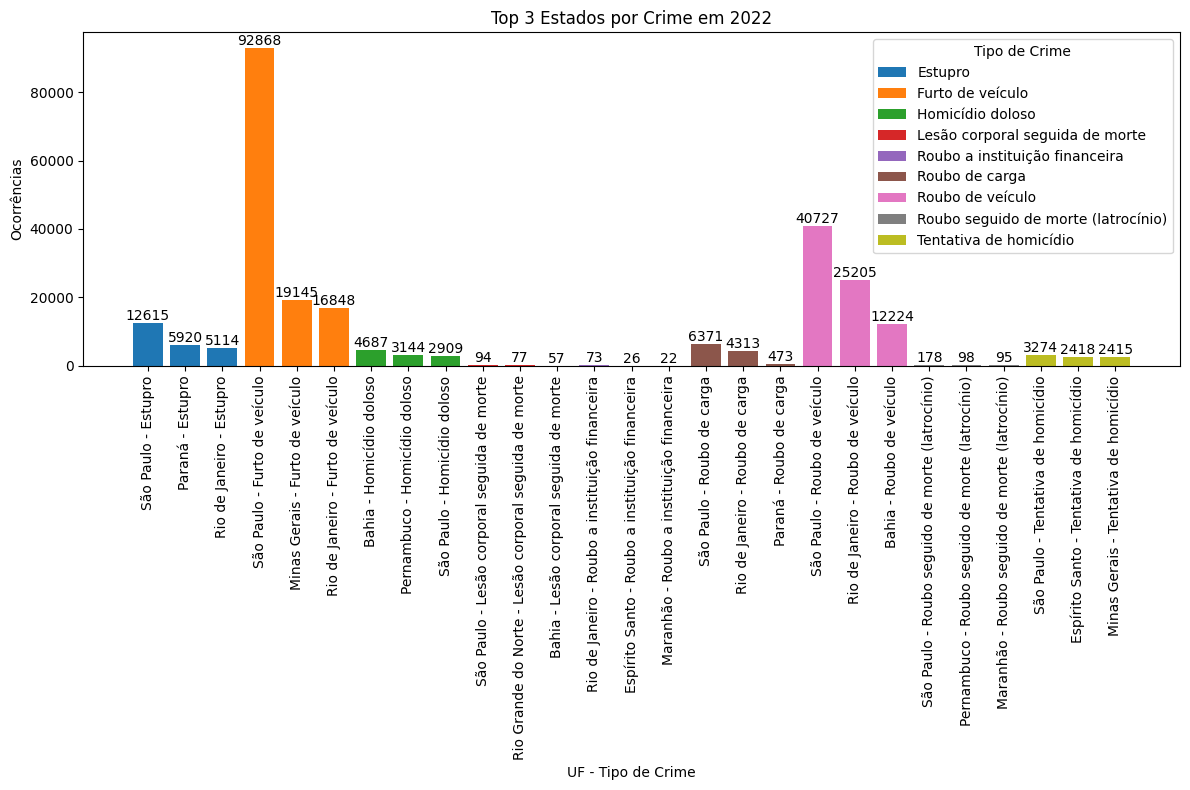

In [8]:
plt.figure(figsize=(12, 8))#define tamanho do grafico
for crime in top_3_estados_por_crime['Tipo Crime'].unique():
    subset = top_3_estados_por_crime[top_3_estados_por_crime['Tipo Crime'] == crime]#tipo de crime é o crime
    bars=plt.bar(subset['UF'] + ' - ' + crime, subset['Ocorrências'], label=crime)#combina o nome do estado com tipo de crime para ser feito a verificacao
    
    for bar, value in zip(bars, subset['Ocorrências']):#aqui adiciona os rótulos nas colunas
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('UF - Tipo de Crime')
plt.ylabel('Ocorrências')
plt.title('Top 3 Estados por Crime em 2022')
plt.legend(title='Tipo de Crime')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

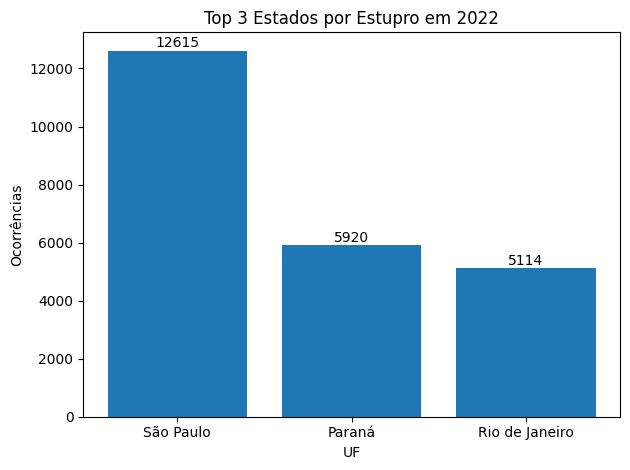

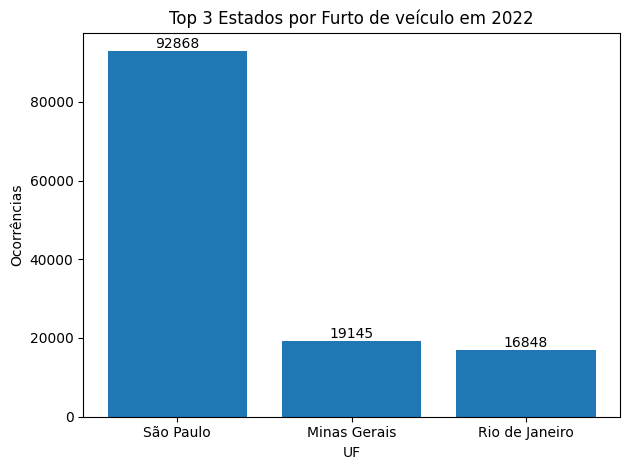

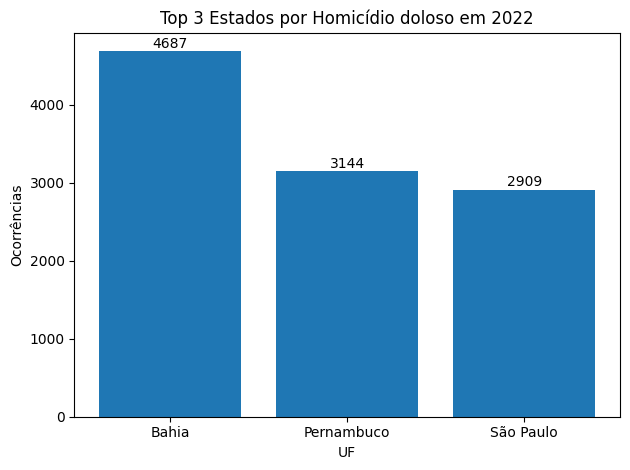

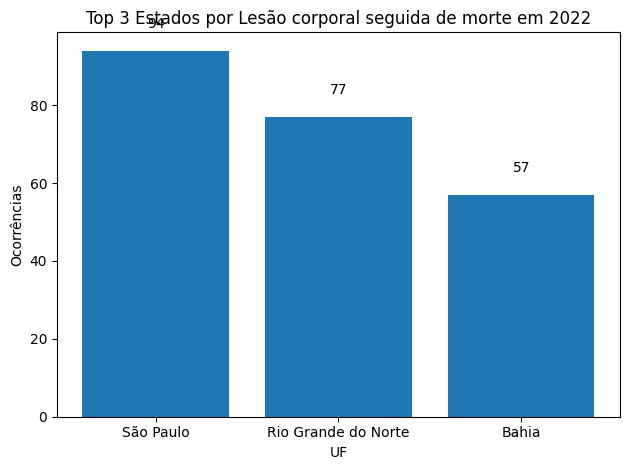

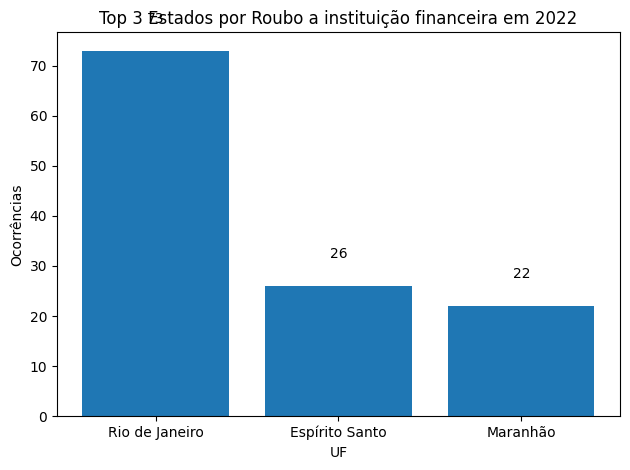

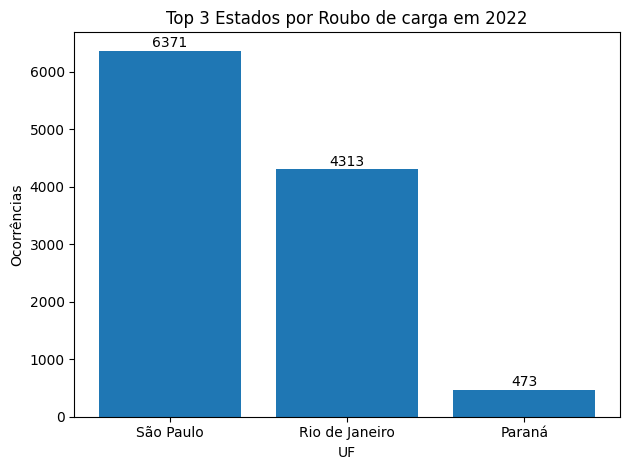

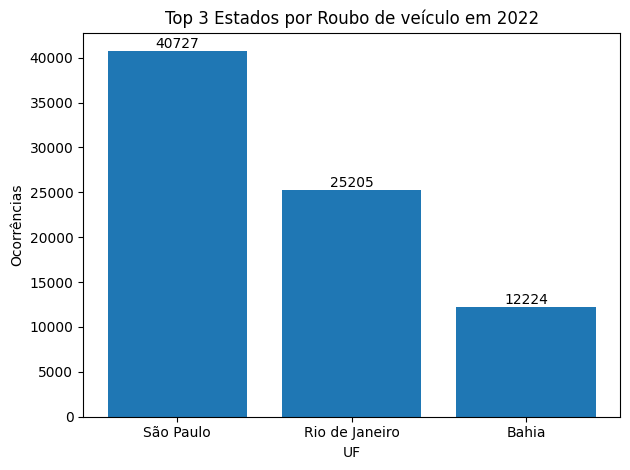

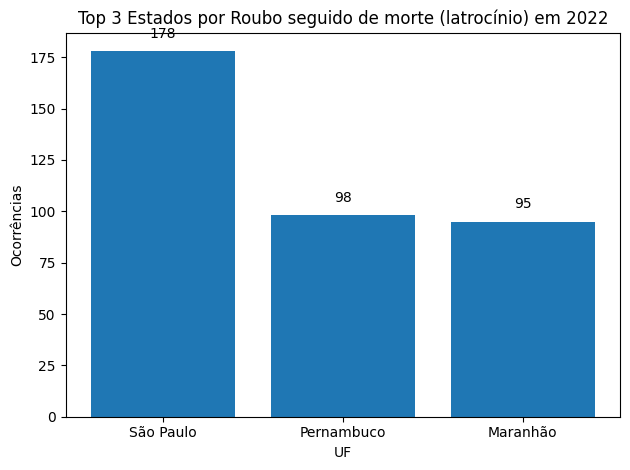

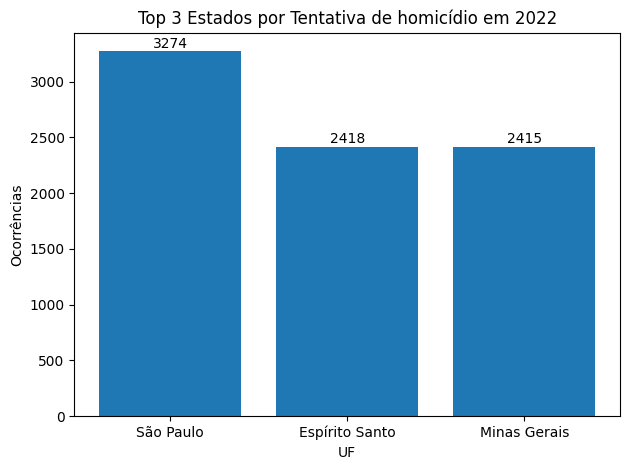

In [9]:
for crime in top_3_estados_por_crime['Tipo Crime'].unique():
    subset = top_3_estados_por_crime[top_3_estados_por_crime['Tipo Crime'] == crime]
    
    #plt.figure(figsize=(5, 8))
    bars = plt.bar(subset['UF'], subset['Ocorrências'], label=crime)
    
    # Adicionar os valores das Ocorrênciass nas barras
    for bar, value in zip(bars, subset['Ocorrências']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('UF')
    plt.ylabel('Ocorrências')
    plt.title(f'Top 3 Estados por {crime} em 2022')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Porém, se eu quisesse comprar todos os top 1 estados por crime, o gráfico geral tem utilidade, no entanto, como nosso foco é um top 3 crimes por estado em 2022, os gráficos individuais nos ajudam melhor.

# Top 3 crimes por estado no ano de 2018

Agora, verificarei de uma outra informação, verei quais os crimes mais praticados em cada estado no ano de 2018.

Seguindo particamente a mesma estrutura, no entanto, só desenvolvi os gráficos individuais para cada estado.


In [10]:
ocorrencia2018=ocorrencia[ocorrencia['Ano']==2018]
agrupado=ocorrencia2022.groupby(['UF','Tipo Crime']).agg({'Ocorrências': 'sum'}).reset_index()
top_3_crime_por_estado = agrupado.sort_values(['UF', 'Ocorrências'], ascending=[True, False]).groupby('UF').head(3)

print(top_3_crime_por_estado)

            UF              Tipo Crime  Ocorrências
6         Acre        Roubo de veículo          660
0         Acre                 Estupro          568
1         Acre        Furto de veículo          513
10     Alagoas        Furto de veículo         2022
15     Alagoas        Roubo de veículo         1696
..         ...                     ...          ...
231  São Paulo        Roubo de veículo        40727
225  São Paulo                 Estupro        12615
235  Tocantins        Furto de veículo         1371
240  Tocantins        Roubo de veículo          416
242  Tocantins  Tentativa de homicídio          395

[81 rows x 3 columns]


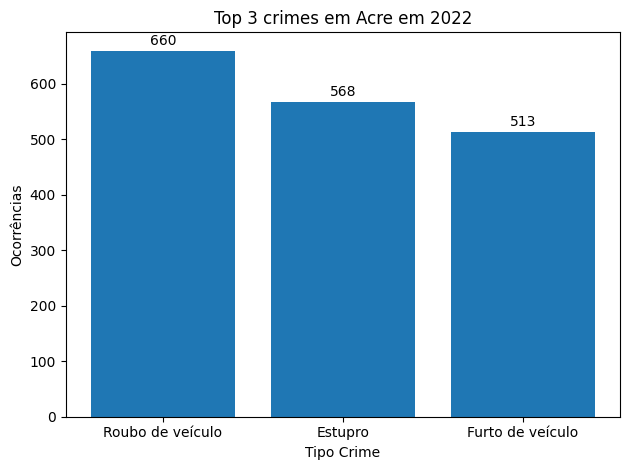

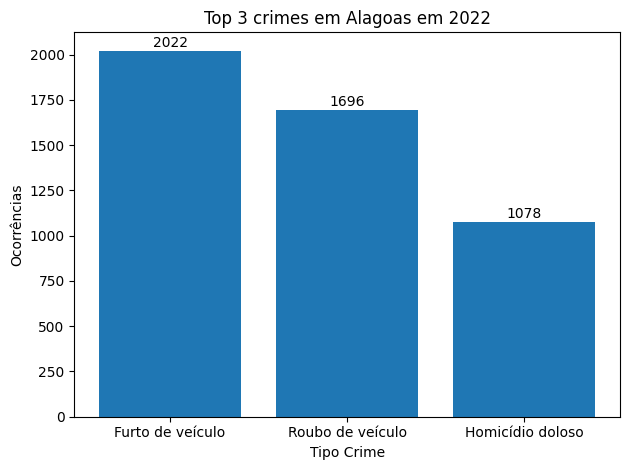

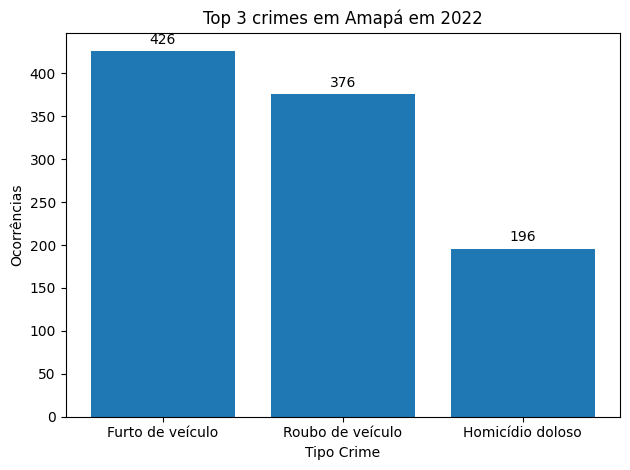

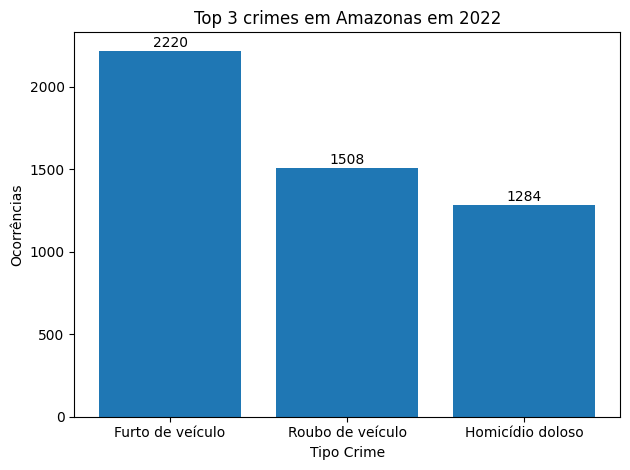

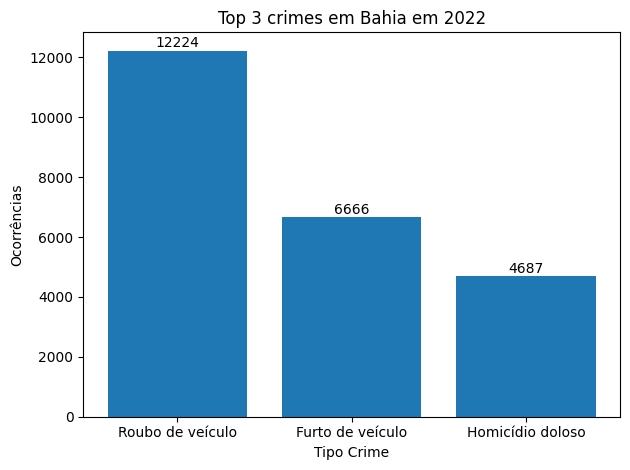

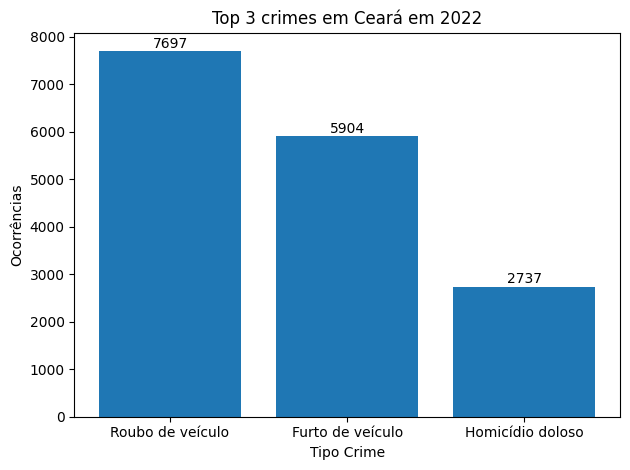

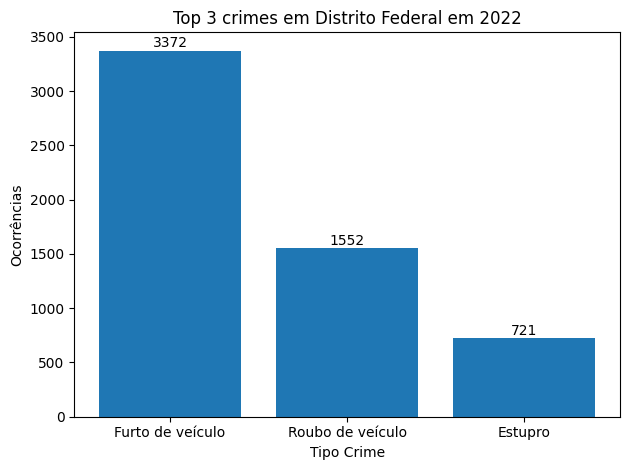

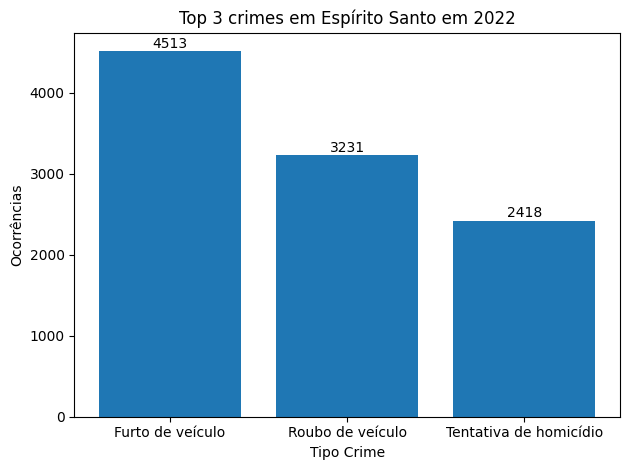

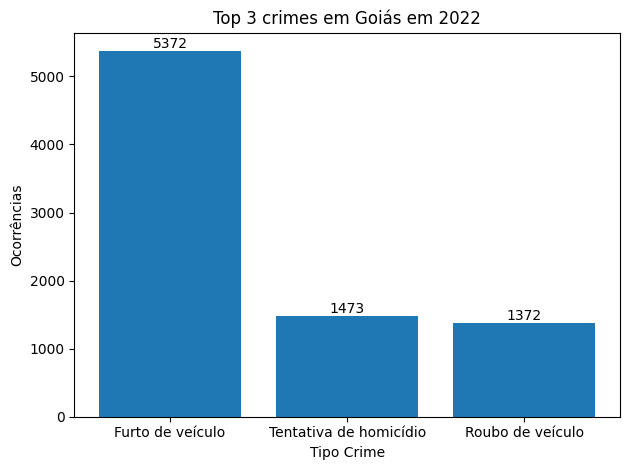

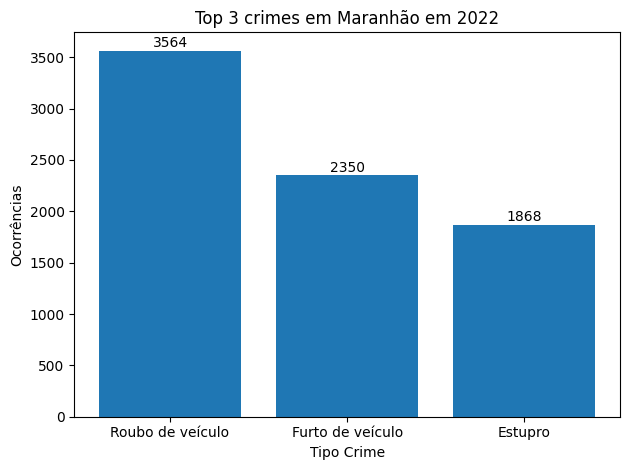

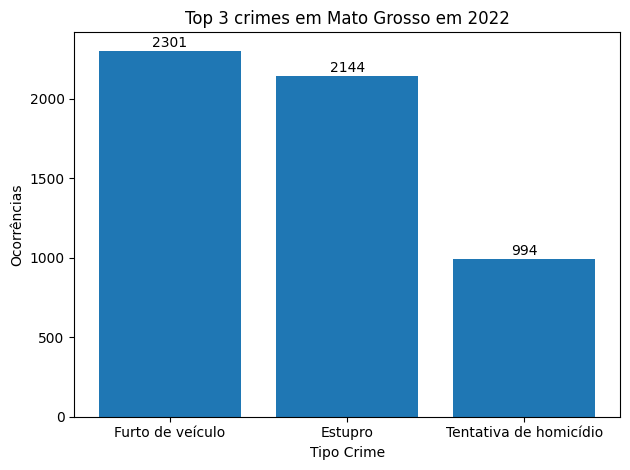

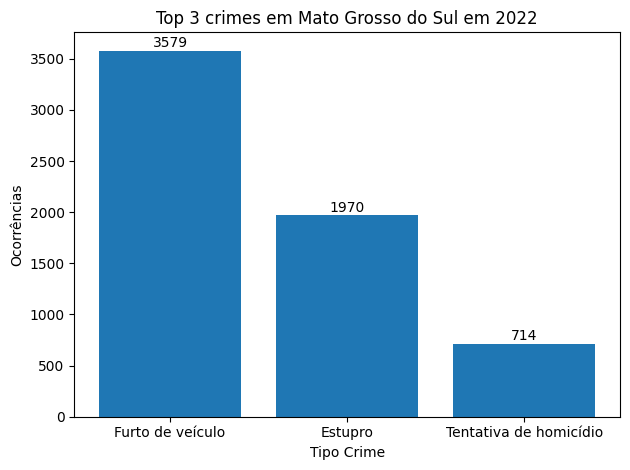

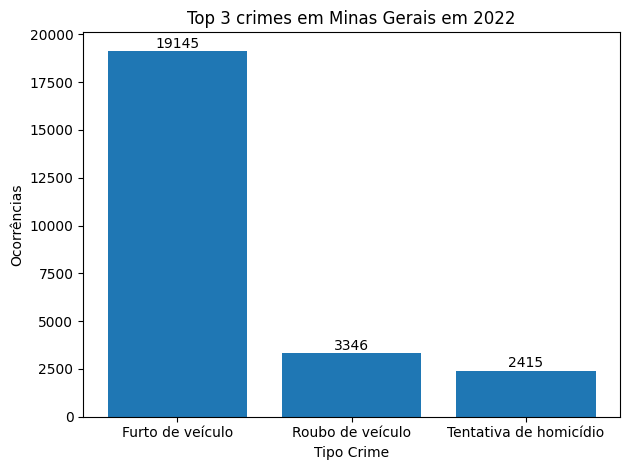

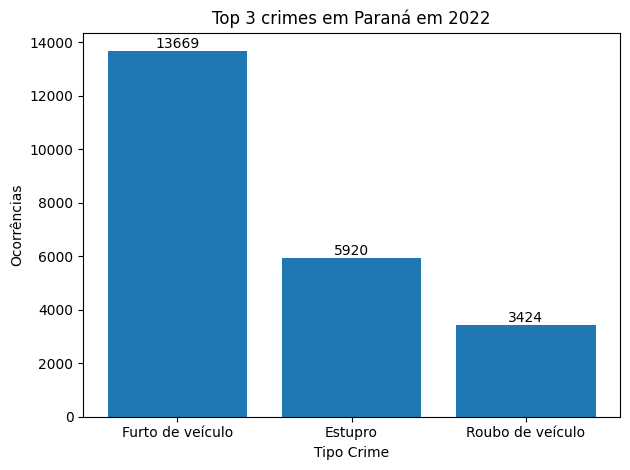

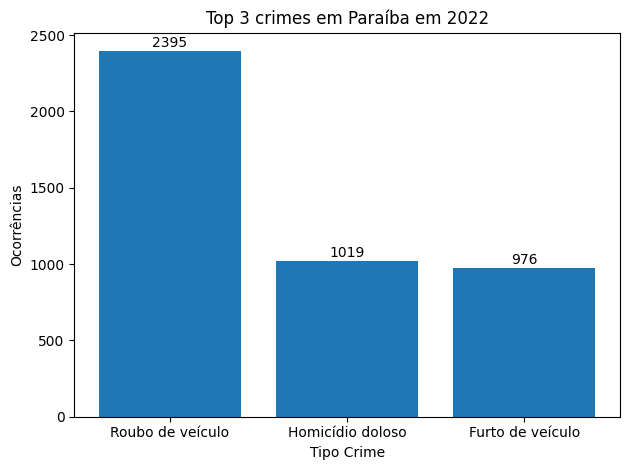

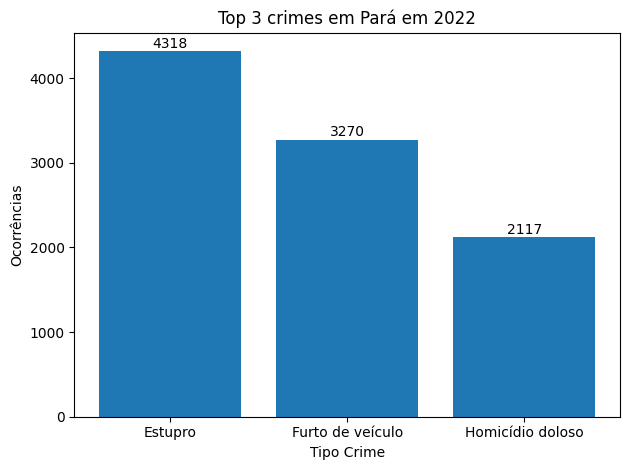

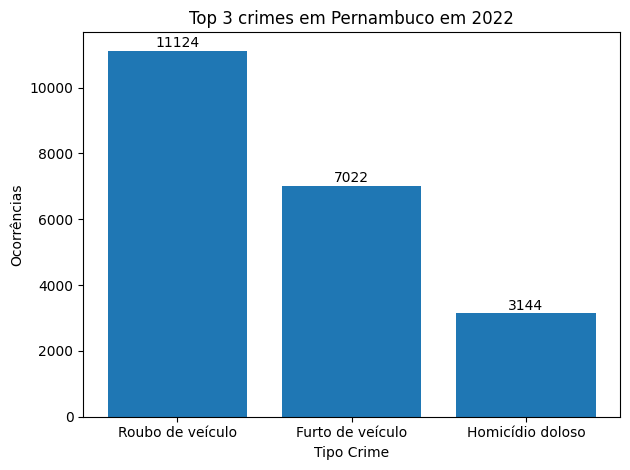

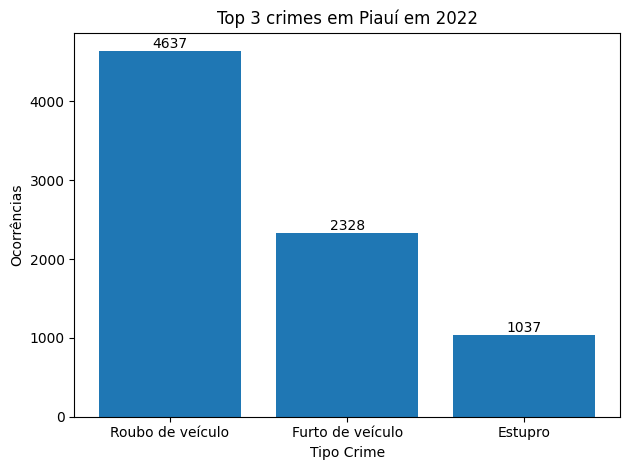

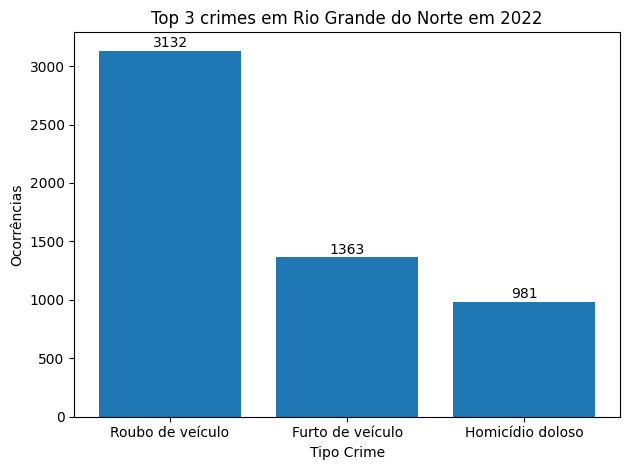

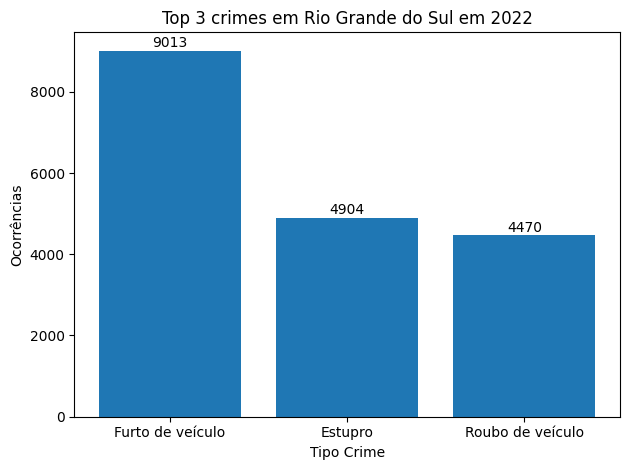

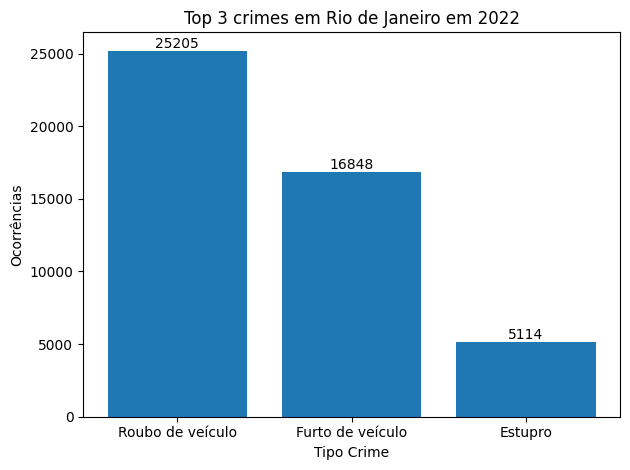

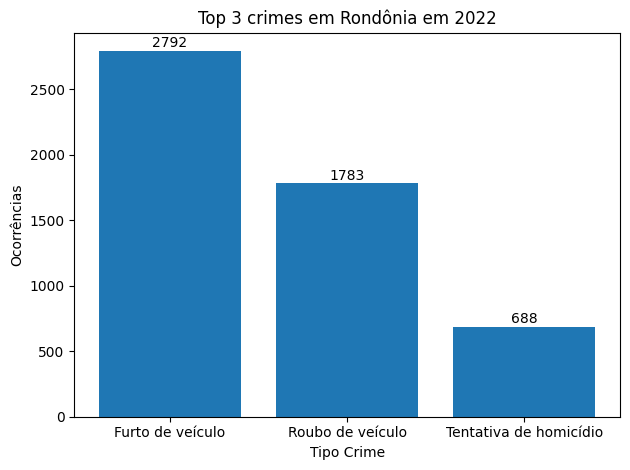

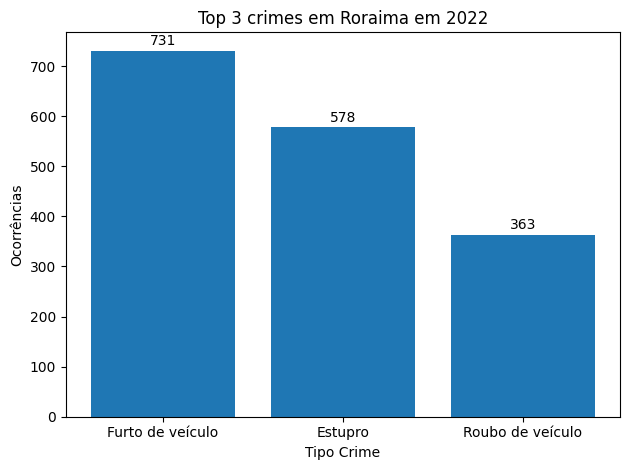

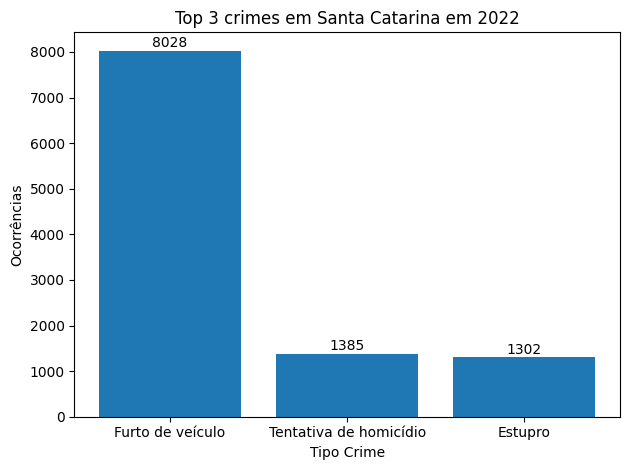

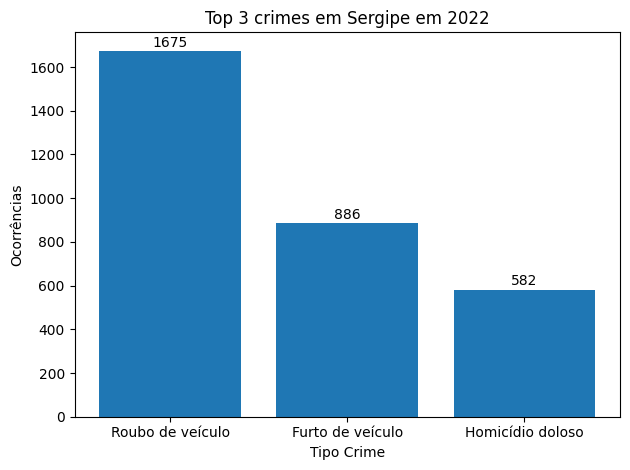

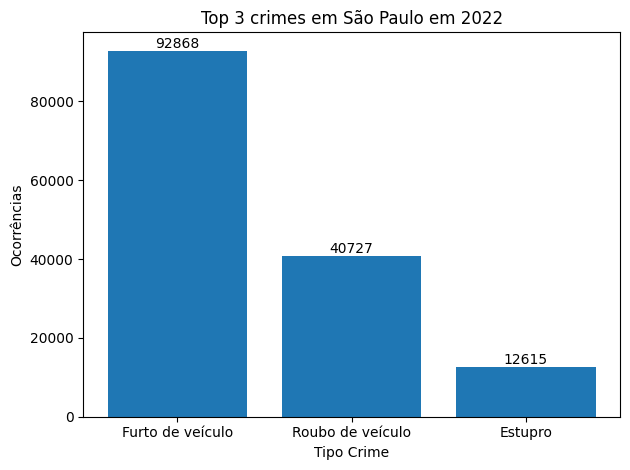

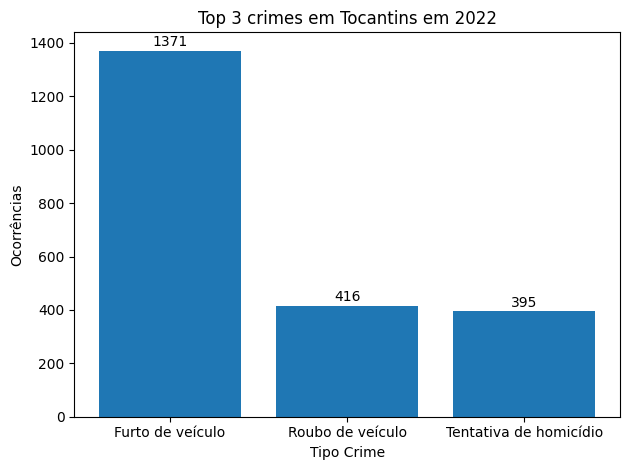

In [11]:
for estado in top_3_crime_por_estado['UF'].unique():
    subset = top_3_crime_por_estado[top_3_crime_por_estado['UF'] == estado]
    
    #plt.figure(figsize=(5, 8))
    bars = plt.bar(subset['Tipo Crime'], subset['Ocorrências'], label=estado)
    
    # Adicionar os valores das Ocorrênciass nas barras
    for bar, value in zip(bars, subset['Ocorrências']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Tipo Crime')
    plt.ylabel('Ocorrências')
    plt.title(f'Top 3 crimes em {estado} em 2022')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Quais violências atingem mais as mulheres?

Para essa analise, será necessário usar a tabela vitímas. Para demonstrar as quantidades usarei informações como, soma de todas as ocorrencias regitradas na base de dados, a média dessas informações, a mediana, porém, para disonibilizar graficamente, utilizarei a soma total, para que nenhuma manipulação ocorra no valor total.


In [12]:
mulheres=vitimas[vitimas['Sexo da Vítima']=='Feminino']
soma=mulheres.Vítimas.sum()

A soma total de crimes cometidos contra mulheres é 31631, ou seja, minha análise não pode obter valores acima desse total.

In [13]:
agrupado=mulheres.groupby('Tipo Crime').agg({'Vítimas': 'sum'}).reset_index()
mulheres_analise = agrupado.sort_values(['Tipo Crime','Vítimas'], ascending=[True, False]).groupby('Tipo Crime').head()
print(mulheres_analise)

                            Tipo Crime  Vítimas
0                     Homicídio doloso    29515
1      Lesão corporal seguida de morte      700
2  Roubo seguido de morte (latrocínio)     1416


Nessa base de dados, as informações registradas para mulheres são apenas três crimes, Homicídio doloso, Lesão corporal seguida de morte e Roubo seguido de morte (latrocínio), ou seja, apenas com essa analise podemos ver um alto nível de feminicídio, visto que todos crimes terminam em morte para as mulheres.

Agora expressado graficamente.

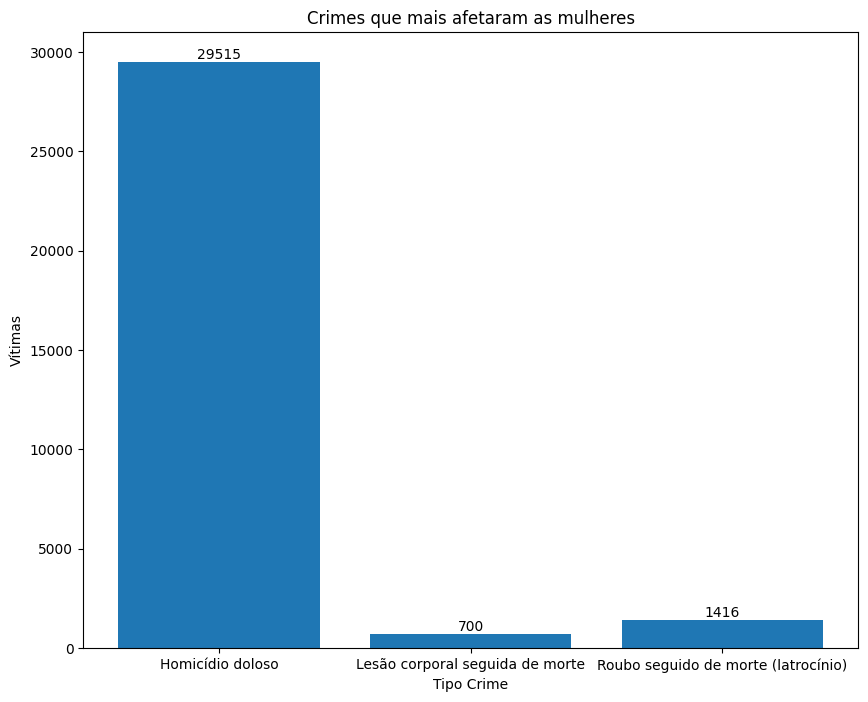

In [14]:
plt.figure(figsize=(10, 8))
barras=plt.bar(mulheres_analise['Tipo Crime'], mulheres_analise['Vítimas'])
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura}', ha='center', va='bottom')

plt.xlabel('Tipo Crime')
plt.ylabel('Vítimas')
plt.title('Crimes que mais afetaram as mulheres')
plt.xticks(rotation=0)
plt.show()

# Quais violências atingem mais os homens?

In [15]:
homens=vitimas[vitimas['Sexo da Vítima']=='Masculino']
soma=homens.Vítimas.sum()
print(soma)

340114


In [16]:
agrupado=homens.groupby('Tipo Crime').agg({'Vítimas': 'sum'}).reset_index()
homens_analise = agrupado.sort_values(['Tipo Crime','Vítimas'], ascending=[True, False]).groupby('Tipo Crime').head()
print(homens_analise)

                            Tipo Crime  Vítimas
0                     Homicídio doloso   323071
1      Lesão corporal seguida de morte     4993
2  Roubo seguido de morte (latrocínio)    12050


to espanatada que so cadastraram esse tipo de violencia na tebala vitimas

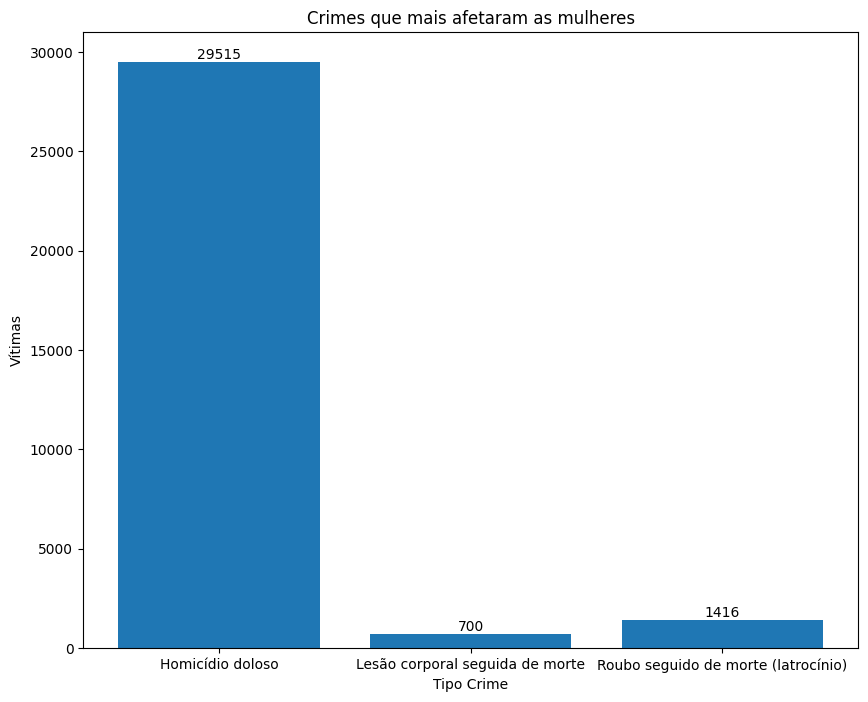

In [17]:
plt.figure(figsize=(10, 8))
barras=plt.bar(mulheres_analise['Tipo Crime'], mulheres_analise['Vítimas'])
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2.0, altura, f'{altura}', ha='center', va='bottom')

plt.xlabel('Tipo Crime')
plt.ylabel('Vítimas')
plt.title('Crimes que mais afetaram as mulheres')
plt.xticks(rotation=0)
plt.show()

# Qual mês mais violento por crime em 2017 em Santa Catarina?


6. Quais os crimes com maior frequência em cada ano no mês de dezembro?
7. Quais os crimes com maior frequência em cada ano no estado do Maranhão?

In [18]:
crime_sc=ocorrencia[ocorrencia['UF']=='Santa Catarina']
agrupado=crime_sc.groupby(['Tipo Crime','Mês']).agg({'Ocorrências': 'sum'}).reset_index()
mes_violento_sc = agrupado.sort_values(['Tipo Crime', 'Ocorrências'], ascending=[True, False]).groupby('Mês').head(3)

print(mes_violento_sc)

          Tipo Crime        Mês  Ocorrências
3            Estupro  fevereiro          877
2            Estupro   dezembro          872
5            Estupro      julho          849
10           Estupro    outubro          836
4            Estupro    janeiro          796
9            Estupro   novembro          796
8            Estupro      março          791
1            Estupro     agosto          778
0            Estupro      abril          771
11           Estupro   setembro          766
7            Estupro       maio          710
6            Estupro      junho          639
16  Furto de veículo    janeiro         7636
20  Furto de veículo      março         7246
15  Furto de veículo  fevereiro         7081
12  Furto de veículo      abril         6997
17  Furto de veículo      julho         6889
19  Furto de veículo       maio         6765
14  Furto de veículo   dezembro         6759
13  Furto de veículo     agosto         6601
18  Furto de veículo      junho         6535
22  Furto 